We start with downloading the libraries we'll need in this project.

In [1]:
import pandas as pd # Essential tool to work with tabular data structures in Python
from sklearn.linear_model import LinearRegression # For linear regression modeling
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For plotting graphs
import matplotlib.ticker as ticker # We'll use it to display the full numbers without scientific notation in plots
from matplotlib.colors import LinearSegmentedColormap, Normalize # For creating custom color maps
import seaborn as sns # For more advanced data visualization
import geopandas as gpd # For geographical data visualization
from IPython.display import display # For displaying objects such as formatted tables in Jupyter

# Configuring Jupyter to display plots inline
%matplotlib inline 

pd.set_option('display.float_format', '{:.1f}'.format) # Formatting floating point numbers to one decimal place in DataFrames

# Introduction

In this project we're going to explore the dataset **"Iowa Motor Fuel Sales by County and Year"**.

Iowa motor fuel retailers are businesses that offer a range of fuel options, including gasoline, diesel, ethanol, and biodiesel. Iowa Code section 452A.33 requires all Iowa fuel retailers to report motor fuel and diesel gallons to the Iowa Department of Revenue and for the Department to prepare and submit an annual report of fuel gallons to the Iowa Governor and Legislature. The full annual reports related to this dataset are published on the [Iowa Department of Revenue web page](https://tax.iowa.gov/report-category/retailers-annual-gallons).

**The State of Iowa set a goal to replace 25.0 percent of petroleum in Iowa with biofuel by 2020,** and the `Biofuel Distribution Percentage` measures how the State is doing toward meeting that goal. 

### Within the scope of this project we'll seek to answer the following questions:

- How have sales of different types of fuel changed over the 2012-2022 period?
- How do fuel sales and the biofuel distribution percentage correlate with the number of retail locations?
- What is the biofuel distribution percentage across different counties, and how does it compare to the state's goal?
- How does the biofuel distribution percentage trend over the years, and does the state meet its 2020 goal?

### The tools we'll use:

- **Python**: Primary programming language used for data manipulation and analysis.
- **Pandas**: Python library for data manipulation and analysis, used for cleaning and transforming the dataset.
- **Matplotlib/Seaborn**: Visualization libraries in Python, employed for creating plots and graphs to explore data trends.
- **Geopandas**: An extension of Pandas, used for working with geospatial data.
- **Scikit-learn**: Machine learning library used for predictive modeling and analysis.
- **NumPy**: A fundamental package for scientific computing in Python.
- **Jupyter Notebook**: Interactive computing environment used for documenting the data analysis process.

# 1. Initial Data Exploration

In this section, we start by identifying the sources from which the data was gathered, ensuring transparency and reliability. We then proceed to load the dataset into our Python environment. A preliminary examination follows, where we explore the dataset's structure, including the number and types of columns, range of values, and any immediately noticeable patterns or anomalies. This initial scrutiny lays the groundwork for our subsequent data cleaning and analysis strategies.

## 1.1. Data Sources

1. The dataset **"Iowa Motor Fuel Sales by County and Year"** has been provided by: Iowa Department of Revenue.

- [Dataset link](https://data.iowa.gov/Sales-Distribution/Iowa-Motor-Fuel-Sales-by-County-and-Year/hbwp-wys3/about_data)
- Access & Use information: This dataset is intended for public access and use.
- License: CC0
- Data Last Updated: March 4, 2024
- Data Coverage: 
  - Start Date: 2012
  - End Date: 2022

2. The Shapefile **"Iowa County Boundaries"**, used for geographical visualization, has been provided by: Iowa Geospatial Data Clearinghouse.

- [Shapefile link](https://geodata.iowa.gov/datasets/iowa::iowa-county-boundaries/about)
- Accessibility: Public - anyone can see this content
- Data Updated: January 28, 2020

## 1.2. Loading the Dataset

In [2]:
# Loading our dataset into a pandas DataFrame
df = pd.read_csv('Iowa_Motor_Fuel_Sales_by_County_and_Year_.csv')
df = df.sort_values(by='Calendar Year')

## 1.3. Preliminary Analysis

**Data.iowa.gov** provided the following description of the dataset's columns:

In [3]:
data = [
    ('Calendar Year', 'Calendar year when fuel was sold', 'Number'),
    ('County', 'County where fuel was sold', 'Plain text'),
    ('Number of Retail Locations', 'Number of retail fuel locations within the county', 'Number'),
    ('Non-Ethanol Gasoline Sales (in gallons)', 'Gallons of non-ethanol gasoline sold', 'Number'),
    ('Ethanol Gasoline Sales (in gallons)', 'Gallons of ethanol gasoline sold', 'Number'),
    ('Clear and Dyed Diesel Sales (in gallons)', 'Gallons of clear and dyed diesel sold', 'Number'),
    ('Clear and Dyed Biodiesel Sales (in gallons)', 'Gallons of clear and dyed biodiesel sold', 'Number'),
    ('Pure Biodiesel Sales (in gallons)', 'Gallons of pure biodiesel sold', 'Number'),
    ('Biofuel Distribution Percentage', 'Biofuel Distribution Percentage\
    = (Pure Ethanol Gallons + Pure Biodiesel Gallons) / Total Gasoline Gallons', 'Number')
    ]

columns = ['Column name', 'Description', 'Type']

descr = pd.DataFrame(data, columns=columns)
descr

,Column name,Description,Type
0,Calendar Year,Calendar year when fuel was sold,Number
1,County,County where fuel was sold,Plain text
2,Number of Retail Locations,Number of retail fuel locations within the county,Number
3,Non-Ethanol Gasoline Sales (in gallons),Gallons of non-ethanol gasoline sold,Number
4,Ethanol Gasoline Sales (in gallons),Gallons of ethanol gasoline sold,Number
5,Clear and Dyed Diesel Sales (in gallons),Gallons of clear and dyed diesel sold,Number
6,Clear and Dyed Biodiesel Sales (in gallons),Gallons of clear and dyed biodiesel sold,Number
7,Pure Biodiesel Sales (in gallons),Gallons of pure biodiesel sold,Number
8,Biofuel Distribution Percentage,Biofuel Distribution Percentage = (Pure Eth...,Number


Now, let's get a basic understanding of our dataset's structure.

In [4]:
df.head()

,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons)\t,Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
0,2012,Adair,12.0,1557206,6642836,4078004,691006.0,NaN,9.1
71,2012,Page,10.0,979351,4901000,725455,464481.0,NaN,8.9
70,2012,Osceola,10.0,405917,2045239,2669896,20324.0,NaN,8.7
69,2012,OBrien,23.0,1594052,5888274,4205427,286830.0,NaN,8.7
68,2012,Muscatine,23.0,2361789,13504308,3294952,128316.0,NaN,8.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075 entries, 0 to 1074
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Calendar Year                                 1075 non-null   int64  
 1   County                                        1075 non-null   object 
 2   Number of Retail Locations                    1059 non-null   float64
 3   Non-Ethanol Gasoline Sales (in gallons)       1075 non-null   int64  
 4   Ethanol Gasoline Sales (in gallons)           1075 non-null   int64  
 5   Clear and Dyed Diesel Sales (in gallons)      1075 non-null   int64  
 6   Clear and Dyed Biodiesel Sales (in gallons)	  1072 non-null   float64
 7   Pure Biodiesel Sales (in gallons)             490 non-null    float64
 8   Biofuel Distribution Percentage               1074 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 84.0+ KB


In [6]:
df.describe()

,Calendar Year,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons)\t,Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
count,1075.0,1059.0,1075.0,1075.0,1075.0,1072.0,490.0,1074.0
mean,2017.0,21.4,2177034.9,12994054.9,3885843.2,4232253.2,2086820.6,12.3
std,3.2,24.0,4238190.0,23015086.0,4900516.6,9933806.1,4029621.5,5.1
min,2012.0,5.0,101439.0,847834.0,-801913.0,0.0,127048.0,0.0
25%,2014.0,11.0,562562.5,4121953.5,1323045.5,283962.0,530819.2,9.6
50%,2017.0,15.0,994336.0,6223643.0,2511573.0,919259.5,855575.5,10.8
75%,2020.0,22.0,1792881.0,10216247.5,4434203.5,2678772.2,1616893.2,12.8
max,2022.0,198.0,42447471.0,196268737.0,73262856.0,106877625.0,39782665.0,50.8


Our dataset has 9 columns and 1075 rows (entries). 

The following columns have their data type set to float, while at the first sight their values look like integers:

- `Number of Retail Locations`
- `Clear and Dyed Biodiesel Sales (in gallons)`
- `Pure Biodiesel Sales (in gallons)`

This is something we'd like to check, and possibly eventually convert the columns' type to integer.

Already now we can see that we have missing values in our dataset, which can be one of the reasons the columns with potentially integer values have been set to float type instead.

We can notice that the column `Clear and Dyed Diesel Sales (in gallons)` has a negative minimum value (-801913.0). We expect all the values of gallons of gas sold to be non-negative, so this is also something we'd like to explore.

Another point of interest is that the column `Clear and Dyed Biodiesel Sales (in gallons)\t` has tab character "\t" in the end of its name. We'd like to remove it for neatness and consistency in column naming.

The description of the dataset provided by data.iowa.gov gives us a few additional important pieces of information:

- `Pure Biodiesel Sales (in gallons)` category was added to the dataset in 2018.
- Counties with five or less locations are reported in aggregate as `Other` between 2011 and 2020 due to confidentiality requirements. Starting in 2021, these counties are reported individually, but categories within the dataset that would violate confidentiality requirements are left blank.

# 2. Data Cleaning

Data cleaning is crucial for preparing the dataset for analysis.

## 2.1. Renaming Columns

There is only one column we'd like to rename due to the formatting issue:

In [7]:
df.rename(columns={"Clear and Dyed Biodiesel Sales (in gallons)\t":
                   "Clear and Dyed Biodiesel Sales (in gallons)"}, inplace=True)

## 2.2. Handling Missing Values

In [8]:
# Checking for missing values
df.isnull().sum()

Calendar Year                                    0
County                                           0
Number of Retail Locations                      16
Non-Ethanol Gasoline Sales (in gallons)          0
Ethanol Gasoline Sales (in gallons)              0
Clear and Dyed Diesel Sales (in gallons)         0
Clear and Dyed Biodiesel Sales (in gallons)      3
Pure Biodiesel Sales (in gallons)              585
Biofuel Distribution Percentage                  1
dtype: int64

We appear to have a certain amount of missing values in different columns of our dataset.

- `Pure Biodiesel Sales (in gallons)` (585 missing)

The large number of missing values in the column `Pure Biodiesel Sales (in gallons)` is explained by the fact that this category was added in 2018.

Let's take a closer look at the rows with values missing in the remaining 3 columns:

- `Number of Retail Locations` (16 missing)
- `Clear and Dyed Biodiesel Sales (in gallons)` (3 missing)
- `Biofuel Distribution Percentage` (1 missing)

In [9]:
df[df[["Number of Retail Locations",
       "Clear and Dyed Biodiesel Sales (in gallons)",
       "Biofuel Distribution Percentage"]].isna().any(axis=1)]

,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
86,2012,Union,13.0,798652,4929075,1200698,NaN,NaN,8.6
85,2012,Taylor,7.0,383788,1991594,1333320,NaN,NaN,9.2
78,2012,Ringgold,6.0,231539,1273918,2084618,NaN,NaN,8.5
169,2013,Other,9.0,823587,5363183,681903,478158.0,NaN,NaN
948,2021,Osceola,NaN,162247,853876,54913,981019.0,146153.0,14.4
944,2021,Monroe,NaN,369370,2942675,0,261046.0,341890.0,10.3
952,2021,Pocahontas,NaN,171202,2089399,275620,27433.0,290525.0,12.8
969,2021,Wayne,NaN,153269,1993967,54262,651222.0,239133.0,11.1
963,2021,Taylor,NaN,235963,1596703,471259,1106171.0,276093.0,15.1
974,2021,Worth,NaN,199822,1162731,592757,105924.0,132162.0,9.7


We'll keep in mind that we have these missing values, but as they don't affect the analysis we're conducting in the scope of this project, we'll keep them as they are. 

## 2.3. Considerations Regarding Data Types

As we saw earlier, the values in the following columns are supposedly integers, but due to the missing value present their data type was set to float:

- `Number of Retail Locations`
- `Clear and Dyed Biodiesel Sales (in gallons)`
- `Pure Biodiesel Sales (in gallons)`

If we removed or filled the missing values, we'd be able to convert the columns' data type to integer. However, the scope of this project doesn't require us to do that, so we'll let the data types be float instead of integer.

## 2.4. Checking String Case

In our dataset, having county names in mixed case formats could lead to inconsistencies, as Python is case-sensitive when it comes to strings.

Let's take a look at the list of unique counties and their total number.

In [10]:
print("The number of unique county names:",  df['County'].nunique())
np.sort(df['County'].unique())

The number of unique county names: 100


array(['Adair', 'Adams', 'Allamakee', 'Appanoose', 'Audubon', 'Benton',
       'Black Hawk', 'Boone', 'Bremer', 'Buchanan', 'Buena Vista',
       'Butler', 'Calhoun', 'Carroll', 'Cass', 'Cedar', 'Cerro Gordo',
       'Cherokee', 'Chickasaw', 'Clarke', 'Clay', 'Clayton', 'Clinton',
       'Crawford', 'Dallas', 'Davis', 'Decatur', 'Delaware', 'Des Moines',
       'Dickinson', 'Dubuque', 'Emmet', 'Fayette', 'Floyd', 'Franklin',
       'Fremont', 'Greene', 'Grundy', 'Guthrie', 'Hamilton', 'Hancock',
       'Hardin', 'Harrison', 'Henry', 'Howard', 'Humboldt', 'Ida', 'Iowa',
       'Jackson', 'Jasper', 'Jefferson', 'Johnson', 'Jones', 'Keokuk',
       'Kossuth', 'Lee', 'Linn', 'Louisa', 'Lucas', 'Lyon', 'Madison',
       'Mahaska', 'Marion', 'Marshall', 'Mills', 'Mitchell', 'Monona',
       'Monroe', 'Montgomery', 'Muscatine', 'OBrien', 'Osceola', 'Other',
       'Page', 'Palo Alto', 'Plymouth', 'Pocahontas', 'Polk',
       'Pottawattamie', 'Poweshiek', 'Ringgold', 'Sac', 'Scott', 'Shelby',


We have 100 unique names in our list: 99 counties and the label `Other`.

Overall, it looks like the names are already in title case, except for one: "O'Brien" is written as `OBrien`, which will create an issue later when we will be merging our dataset with geographical data for the counties' borders. To avoid that, we'll reinforce title case in the County column. 

In [11]:
df['County'] = df['County'].str.title().str.strip()

## 2.5. Handling Duplicates

In [12]:
# Identifying duplicates
print(df.duplicated().sum())

0


We don't have duplicates in our dataset.

## 2.6. Identifying Outliers

As we could see in the beginning when we used the command `df.describe()`, the column `Clear and Dyed Diesel Sales (in gallons)` had a negative minimum value. All the columns with the numbers of gallons of gas sold are supposed to have non-negative values, so this indicates a possible error. 

Let's check if there were more negative values in that column.

In [13]:
df[df['Clear and Dyed Diesel Sales (in gallons)'] < 0]

,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
284,2014,Wapello,27.0,2091158,15126339,-801913,3887157.0,NaN,11.3


We have only one row with a negative value.

I'll assume the minus sign was written by a mistake, and rewrite the value accordingly.

In [14]:
# Applying the absolute value function to each entry
df['Clear and Dyed Diesel Sales (in gallons)'] = df['Clear and Dyed Diesel Sales (in gallons)'].abs()

# Checking how our column's descriptive statistics look now
df.describe()

,Calendar Year,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
count,1075.0,1059.0,1075.0,1075.0,1075.0,1072.0,490.0,1074.0
mean,2017.0,21.4,2177034.9,12994054.9,3887335.1,4232253.2,2086820.6,12.3
std,3.2,24.0,4238190.0,23015086.0,4899332.1,9933806.1,4029621.5,5.1
min,2012.0,5.0,101439.0,847834.0,0.0,0.0,127048.0,0.0
25%,2014.0,11.0,562562.5,4121953.5,1323045.5,283962.0,530819.2,9.6
50%,2017.0,15.0,994336.0,6223643.0,2511573.0,919259.5,855575.5,10.8
75%,2020.0,22.0,1792881.0,10216247.5,4434203.5,2678772.2,1616893.2,12.8
max,2022.0,198.0,42447471.0,196268737.0,73262856.0,106877625.0,39782665.0,50.8


Except for the minimum value, the rest of the statisctics for the column `Clear and Dyed Diesel Sales (in gallons)` didn't change significantly. 

Now let's look at the other kinds of possible outliers.

In [82]:
# List of columns we want to check for outliers
columns_to_check = [
    'Number of Retail Locations',
    'Non-Ethanol Gasoline Sales (in gallons)',
    'Ethanol Gasoline Sales (in gallons)',
    'Clear and Dyed Diesel Sales (in gallons)',
    'Clear and Dyed Biodiesel Sales (in gallons)',
    'Pure Biodiesel Sales (in gallons)',
    'Biofuel Distribution Percentage'
    ]

# We iterate over our list of columns,
# identifying outliers as values more than 3 standard deviations from the mean in each column
for column in columns_to_check:
    mean = df[column].mean()
    std_dev = df[column].std()
    outliers = df[(df[column] < mean - 3 * std_dev) | (df[column] > mean + 3 * std_dev)]
    
    # Checking if there are any outliers in the current column
    if not outliers.empty:
        print(f"Outliers in '{column}':")
        display(outliers)
    else:
        print(f"No outliers found in '{column}'.")

Outliers in 'Number of Retail Locations':


,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
55,2012,Linn,94.0,15088079,77556050,10280258,3474734.0,NaN,9.2
80,2012,Scott,96.0,12999272,98638931,5462876,48654908.0,NaN,14.5
75,2012,Polk,183.0,40079583,173243607,29642234,57297506.0,NaN,11.7
173,2013,Pocahontas,188.0,42447471,166859941,17734427,65078180.0,NaN,7.8
271,2014,Polk,185.0,38839714,172243978,24225407,65283768.0,NaN,11.8
368,2015,Polk,184.0,37875255,179477319,34445509,43595531.0,NaN,11.5
466,2016,Polk,189.0,35778729,195062462,36224573,44150831.0,NaN,12.0
562,2017,Polk,180.0,32404264,193991854,30581285,44982291.0,NaN,13.2
533,2017,Iowa,138.0,9277052,50093059,43022172,18326107.0,NaN,12.0
639,2018,Linn,94.0,14152821,86090590,13858223,13397983.0,11548990.0,11.5


Outliers in 'Non-Ethanol Gasoline Sales (in gallons)':


,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
55,2012,Linn,94.0,15088079,77556050,10280258,3474734.0,NaN,9.2
75,2012,Polk,183.0,40079583,173243607,29642234,57297506.0,NaN,11.7
29,2012,Dubuque,70.0,15531979,36254336,7427252,4139469.0,NaN,7.7
153,2013,Linn,89.0,16095788,78522584,10154292,5074184.0,NaN,8.4
173,2013,Pocahontas,188.0,42447471,166859941,17734427,65078180.0,NaN,7.8
271,2014,Polk,185.0,38839714,172243978,24225407,65283768.0,NaN,11.8
224,2014,Dubuque,66.0,15161915,83300705,13574401,20460061.0,NaN,9.8
368,2015,Polk,184.0,37875255,179477319,34445509,43595531.0,NaN,11.5
466,2016,Polk,189.0,35778729,195062462,36224573,44150831.0,NaN,12.0
562,2017,Polk,180.0,32404264,193991854,30581285,44982291.0,NaN,13.2


Outliers in 'Ethanol Gasoline Sales (in gallons)':


,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
80,2012,Scott,96.0,12999272,98638931,5462876,48654908.0,NaN,14.5
75,2012,Polk,183.0,40079583,173243607,29642234,57297506.0,NaN,11.7
173,2013,Pocahontas,188.0,42447471,166859941,17734427,65078180.0,NaN,7.8
178,2013,Sac,86.0,8551677,89366399,6344185,54340336.0,NaN,8.8
250,2014,Linn,87.0,12034833,82057462,10082793,5465565.0,NaN,10.0
276,2014,Scott,80.0,5103629,84949581,8392065,53031793.0,NaN,16.2
271,2014,Polk,185.0,38839714,172243978,24225407,65283768.0,NaN,11.8
224,2014,Dubuque,66.0,15161915,83300705,13574401,20460061.0,NaN,9.8
368,2015,Polk,184.0,37875255,179477319,34445509,43595531.0,NaN,11.5
322,2015,Dickinson,69.0,14138283,84889429,21012050,14488623.0,NaN,8.7


Outliers in 'Clear and Dyed Diesel Sales (in gallons)':


,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
75,2012,Polk,183.0,40079583,173243607,29642234,57297506.0,NaN,11.7
271,2014,Polk,185.0,38839714,172243978,24225407,65283768.0,NaN,11.8
368,2015,Polk,184.0,37875255,179477319,34445509,43595531.0,NaN,11.5
369,2015,Pottawattamie,71.0,7140785,58585756,25063883,42644651.0,NaN,17.3
322,2015,Dickinson,69.0,14138283,84889429,21012050,14488623.0,NaN,8.7
446,2016,Linn,90.0,14613519,85822617,18560086,5996964.0,NaN,10.1
466,2016,Polk,189.0,35778729,195062462,36224573,44150831.0,NaN,12.0
437,2016,Iowa,90.0,5781755,30832709,19431252,10748098.0,NaN,12.4
562,2017,Polk,180.0,32404264,193991854,30581285,44982291.0,NaN,13.2
533,2017,Iowa,138.0,9277052,50093059,43022172,18326107.0,NaN,12.0


Outliers in 'Clear and Dyed Biodiesel Sales (in gallons)':


,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
80,2012,Scott,96.0,12999272,98638931,5462876,48654908.0,NaN,14.5
75,2012,Polk,183.0,40079583,173243607,29642234,57297506.0,NaN,11.7
173,2013,Pocahontas,188.0,42447471,166859941,17734427,65078180.0,NaN,7.8
178,2013,Sac,86.0,8551677,89366399,6344185,54340336.0,NaN,8.8
276,2014,Scott,80.0,5103629,84949581,8392065,53031793.0,NaN,16.2
271,2014,Polk,185.0,38839714,172243978,24225407,65283768.0,NaN,11.8
368,2015,Polk,184.0,37875255,179477319,34445509,43595531.0,NaN,11.5
373,2015,Scott,82.0,5051235,75429524,11569714,36145854.0,NaN,15.1
369,2015,Pottawattamie,71.0,7140785,58585756,25063883,42644651.0,NaN,17.3
471,2016,Scott,81.0,5763983,73050772,10779876,58475128.0,NaN,19.2


Outliers in 'Pure Biodiesel Sales (in gallons)':


,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
660,2018,Polk,191.0,34079471,196268737,25459401,42241981.0,28059217.0,12.2
665,2018,Scott,91.0,6012589,88505697,5086030,57367695.0,17721447.0,18.8
763,2019,Scott,106.0,8812794,99949340,4811561,50724343.0,18240320.0,16.8
758,2019,Polk,198.0,34972248,193531597,26874086,66792202.0,30927502.0,13.5
855,2020,Polk,198.0,30949625,163247695,22692805,55926584.0,26166863.0,13.5
860,2020,Scott,91.0,9912938,78497566,2572829,52410915.0,16324278.0,18.5
958,2021,Scott,155.0,6951861,87946318,4338954,47106843.0,16916609.0,17.8
953,2021,Polk,122.0,23285527,146909546,17160574,36254399.0,20805288.0,12.2
924,2021,Iowa,160.0,31192310,179475436,73262856,106877625.0,39782665.0,18.9
1057,2022,Scott,83.0,15788694,84179581,6484316,66877090.0,19741300.0,20.0


Outliers in 'Biofuel Distribution Percentage':


,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
331,2015,Guthrie,17.0,1172700,7496241,4299226,2988740.0,NaN,30.0
428,2016,Guthrie,13.0,602738,5130010,1340136,8298995.0,NaN,29.8
425,2016,Fremont,8.0,373687,4656500,1098401,11276770.0,NaN,40.7
564,2017,Poweshiek,19.0,1392103,12621773,1847310,21490833.0,NaN,34.0
521,2017,Fremont,9.0,621548,7439288,1203249,16884463.0,NaN,41.6
524,2017,Guthrie,12.0,598452,5266879,889577,7768626.0,NaN,30.3
662,2018,Poweshiek,21.0,1600909,12737139,3236216,21058988.0,4800251.0,33.5
621,2018,Guthrie,12.0,388988,5122054,904536,7427999.0,1722780.0,31.3
618,2018,Fremont,6.0,241261,4359430,1249049,10157498.0,1901549.0,41.3
760,2019,Poweshiek,24.0,2892244,13216039,3454599,23800210.0,5215782.0,32.4


As we can notice, a lot of the outlier rows belong to the same group of counties. Those rows, most likely, correctly and consistently reflect the reality rather than indicate an error.

Nonetheless, if we were planning to implement a machine learning model, we might have preferred to exclude those rows to increase the model's predicive accuracy by avoiding the outliers skewing and misleading the training process.

For now, we intend to keep these rows.

However, we'd like to closer inspect the counties that are mentioned only once. Let's get a list of counties along with the number of times they get mentioned in our outliers. 

In [16]:
# An empty list to store outlier counties
outlier_counties = []

for column in columns_to_check:
    outlier_rows = df[(df[column] < df[column].mean() - 3 * df[column].std()) |
                      (df[column] > df[column].mean() + 3 * df[column].std())]
    outlier_counties.extend(outlier_rows['County'].tolist())

# Converting the list to a DataFrame and counting occurrences
county_counts = pd.DataFrame(outlier_counties, columns=['County']).value_counts().reset_index(name='Count')

# Sorting the DataFrame by the count
county_counts = county_counts.sort_values(by='Count', ascending=False)

county_counts

,County,Count
0,Polk,53
1,Scott,25
2,Iowa,12
3,Pottawattamie,9
4,Linn,8
5,Poweshiek,7
6,Fremont,7
7,Guthrie,7
9,Pocahontas,4
8,Dubuque,4


- Lee County has an outlier in the column `Number of Retail Locations` for 2015
- Sioux County has an outlier in the column `Clear and Dyed Diesel Sales (in gallons)` for 2022
- Clarke, Floyd and Greene Counties have outliers in the column `Biofuel Distribution Percentage` for 2022, 2022 and 2013 years respectively

Taking a look at the visualization of these counties' metrics over years can help us to understand how realistic these numbers are.

We'll start with the values of `Number of Retail Locations` in Lee.

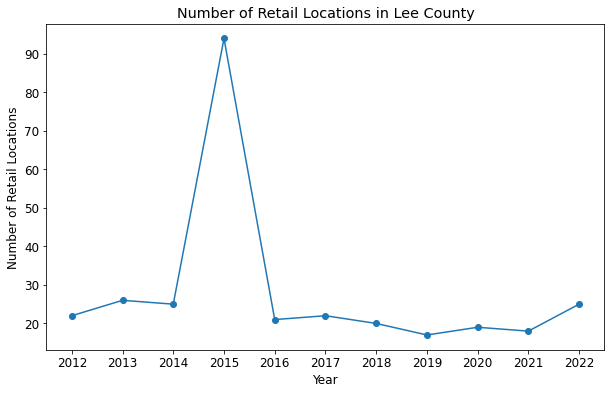

In [17]:
# Filtering for the specified county
filtered_df = df[df['County'].isin(['Lee'])]

# Plotting
plt.rcParams['font.size'] = 12 
plt.figure(figsize=(10, 6))

plt.plot(filtered_df['Calendar Year'], filtered_df['Number of Retail Locations'], marker='o')

plt.title('Number of Retail Locations in Lee County')
plt.xlabel('Year')
plt.ylabel('Number of Retail Locations')
plt.xticks(filtered_df['Calendar Year'], rotation=0)
plt.show()

Given the unexpected increase in `Number of Retail Locations` in 2015, which deviates significantly from surrounding years, I will adjust this value to the mean of the 2014 and 2016 figures to better reflect a realistic trend.

In [18]:
# Filtering the DataFrame for Lee County and the specific years
lee_data = df[(df['County'] == 'Lee') & (df['Calendar Year'].isin([2014, 2016]))]

# Calculating the mean of 'Number of Retail Locations' for 2014 and 2016
mean_value = lee_data['Number of Retail Locations'].mean()

# Locating the row for Lee County in 2015 and updating the value
df.loc[(df['County'] == 'Lee') & (df['Calendar Year'] == 2015), 'Number of Retail Locations'] = mean_value

Then, we'll look at `Clear and Dyed Diesel Sales (in gallons)` in Sioux.

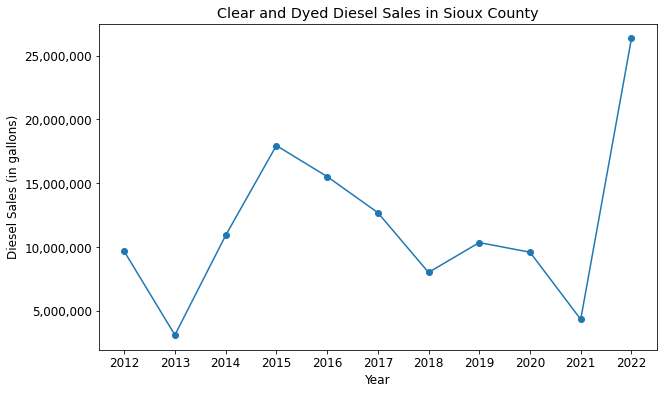

In [19]:
# Filtering for the specified county
filtered_df = df[df['County'].isin(['Sioux'])]

# Plotting
plt.rcParams['font.size'] = 12 
plt.figure(figsize=(10, 6))

plt.plot(filtered_df['Calendar Year'], filtered_df['Clear and Dyed Diesel Sales (in gallons)'], marker='o')

plt.title('Clear and Dyed Diesel Sales in Sioux County')
plt.xlabel('Year')
plt.ylabel('Diesel Sales (in gallons)')
plt.xticks(filtered_df['Calendar Year'], rotation=0)

# To display the full numbers without scientific notation in y axis for clarity:
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) 

plt.show()

An uncharacteristic surge in 2022 diverges from the preceding downward trend. Given the lack of subsequent data, I will cautiously align the 2022 figure with the 2021 data.

In [20]:
# Locating the row for Sioux County in 2021 and getting the value
value_2021 = df.loc[(df['County'] == 'Sioux') & (df['Calendar Year'] == 2021),
                    'Clear and Dyed Diesel Sales (in gallons)'].values[0]

# Replacing the 2022 value for Sioux County with the 2021 value
df.loc[(df['County'] == 'Sioux') & (df['Calendar Year'] == 2022), 'Clear and Dyed Diesel Sales (in gallons)'] = value_2021

Now we're going to explore `Biofuel Distribution Percentage` for Clarke, Floyd and Greene Counties.

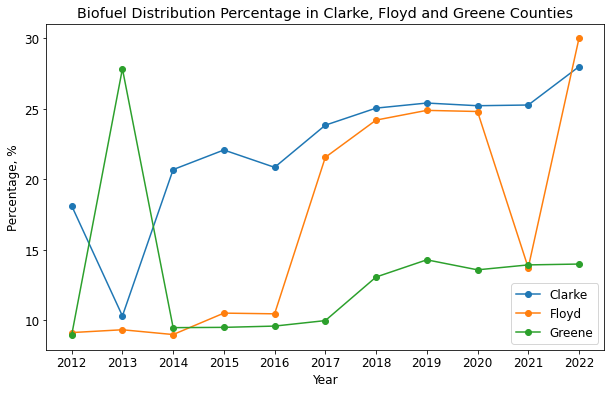

In [21]:
# Filtering for the specified counties
filtered_df = df[df['County'].isin(['Clarke', 'Floyd', 'Greene'])]

# Plotting
plt.figure(figsize=(10, 6))
for county in ['Clarke', 'Floyd', 'Greene']:
    county_data = filtered_df[filtered_df['County'] == county]
    plt.plot(county_data['Calendar Year'], county_data['Biofuel Distribution Percentage'],
             label=county, marker='o')

plt.title('Biofuel Distribution Percentage in Clarke, Floyd and Greene Counties')
plt.xlabel('Year')
plt.ylabel('Percentage, %')
plt.xticks(county_data['Calendar Year'], rotation=0)
plt.legend()
plt.show()

The suspected outliers are:

- Clarke, 2022. As we can see on the visualization, that value continues the trend of the previous years rather smoothly, and so I'm inclined to keep it the way it is.
- Floyd, 2022. The value for 2022 looks like a sharp increase compared to the significant dip in 2021, but otherwise doesn't deviate too much from the trend of the several years prior to 2021. I decide to keep this value as well.
- Greene, 2013. This value looks like an unexpected surge compared to the overall trend of the County throughout the registered years, and I will substitute the outlier with the mean value of the data from 2012 and 2014 years, providing a more balanced representation.

In [22]:
# Calculating the mean for Greene in 2013
mean_value = df[(df['County'] == "Greene") & (df['Calendar Year'].isin([2012, 2014]))]['Biofuel Distribution Percentage'].mean()

# Replacing the 2013 value
df.loc[(df['County'] == "Greene") & (df['Calendar Year'] == 2013), 'Biofuel Distribution Percentage'] = mean_value

Additionally, in the step **3.1. Impact of Retail Locations** a scatter plot reveals one more outlier that we haven't identified earlier: a data point with `Biofuel Distribution Percentage` close to 0.

I'd like to explore it here in the Data Cleaning Section before moving on into Analysis.

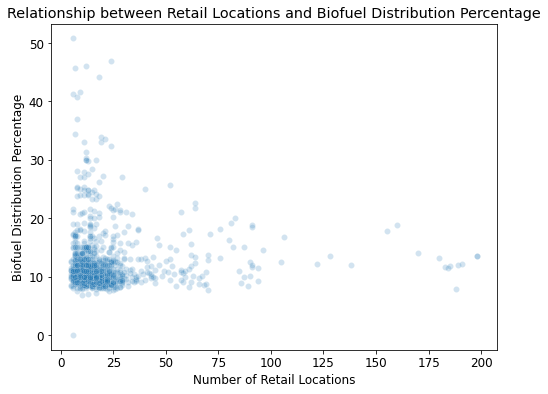

In [23]:
# Recreating the plot from the step 3.1. Impact of Retail Locations
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Number of Retail Locations', y='Biofuel Distribution Percentage', alpha=0.2)
plt.title('Relationship between Retail Locations and Biofuel Distribution Percentage')
plt.xlabel('Number of Retail Locations')
plt.ylabel('Biofuel Distribution Percentage')
    
# To display the full numbers without scientific notation in y axis for clarity:
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) 
plt.show()

It looks like the rest of the values of `Biofuel Distribution Percentage` are above 5, so we'll filter the rows with the values below 5% to inspect our outlier. 

In [24]:
df[df['Biofuel Distribution Percentage'] < 5]

,Calendar Year,County,Number of Retail Locations,Non-Ethanol Gasoline Sales (in gallons),Ethanol Gasoline Sales (in gallons),Clear and Dyed Diesel Sales (in gallons),Clear and Dyed Biodiesel Sales (in gallons),Pure Biodiesel Sales (in gallons),Biofuel Distribution Percentage
266,2014,Other,6.0,414135,2859966,403002,0.0,NaN,0.0


It appears to be one of the aggregated entries.

While it's very unlikely that the `Biofuel Distribution Percentage` value is truly 0 for this entry, the consequences of this error aren't significant in the scope of our project, and we leave the entry in our dataset.

# 3. Analysis

In this section, we delve deep into the dataset to uncover trends, patterns, and insights.

## 3.1. Trend Analysis

We begin by analyzing sales trends over the years to understand the market dynamics for different types of fuels.

In [25]:
# Calculating the sum of different fuel types in each year
annual_sales = df.groupby('Calendar Year').agg({
    'Non-Ethanol Gasoline Sales (in gallons)': 'sum',
    'Ethanol Gasoline Sales (in gallons)': 'sum',
    'Clear and Dyed Diesel Sales (in gallons)': 'sum',
    'Clear and Dyed Biodiesel Sales (in gallons)': 'sum',
    'Pure Biodiesel Sales (in gallons)': 'sum'
    }).reset_index()

annual_sales.columns = ['Year',
                        'Total Non-Ethanol Gasoline Sales',
                        'Total Ethanol Gasoline Sales',
                        'Total Clear and Dyed Diesel Sales',
                        'Total Clear and Dyed Biodiesel Sales',
                        'Total Pure Biodiesel Sales']

annual_sales

,Year,Total Non-Ethanol Gasoline Sales,Total Ethanol Gasoline Sales,Total Clear and Dyed Diesel Sales,Total Clear and Dyed Biodiesel Sales,Total Pure Biodiesel Sales
0,2012,271792785,1215702670,387461782,285833416.0,0.0
1,2013,259600967,1198863348,359171054,347804778.0,0.0
2,2014,213252397,1285689961,371840409,354750929.0,0.0
3,2015,218582455,1333798387,481092672,341788476.0,0.0
4,2016,218582285,1371488250,461762522,379849168.0,0.0
5,2017,199380476,1364321275,402720827,435041823.0,0.0
6,2018,202314941,1356680718,367184974,458870419.0,209475492.0
7,2019,211549042,1353374086,342461003,495123641.0,216961398.0
8,2020,199524420,1141054742,320276745,493659791.0,194251492.0
9,2021,183150085,1233666986,313342924,454561634.0,203665474.0


Let's visualize this table as a line plot.

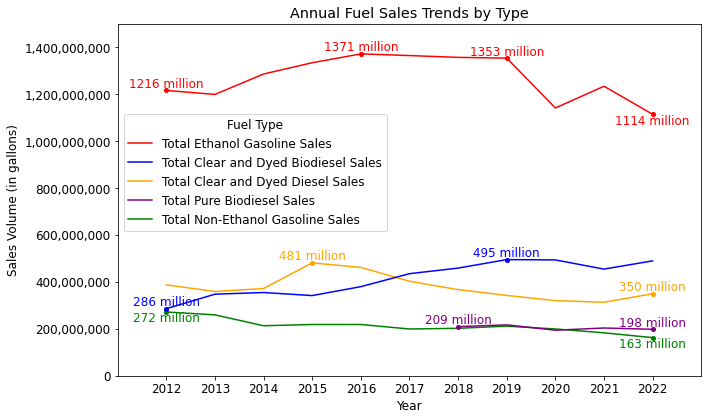

In [26]:
long_format = annual_sales.melt(id_vars=['Year'], var_name='Fuel Type', value_name='Sales Volume')

# Excluding 'Total Pure Biodiesel Sales' before 2018, so its values don't show up as zeroes on the visualization
long_format = long_format.query("`Year` >= 2018 or `Fuel Type` != 'Total Pure Biodiesel Sales'")

# Defining a custom color palette
custom_palette = sns.color_palette(['green', 'red', 'orange', 'blue', 'purple'])

# Determining the most recent year in your dataset
most_recent_year = long_format['Year'].max()

# Filtering the dataset for the most recent year and sorting it by 'Sales Volume'
sorted_data_for_legend = long_format[long_format['Year'] == most_recent_year].sort_values(by='Sales Volume', ascending=False)

# Extracting the order of 'Fuel Type' based on sorted sales volume
legend_order = sorted_data_for_legend['Fuel Type'].unique()

# Plotting
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=long_format, x='Year', y='Sales Volume', hue='Fuel Type', palette=custom_palette)
plt.title('Annual Fuel Sales Trends by Type')
plt.xlabel('Year')
plt.ylabel('Sales Volume (in gallons)')

# Setting x-axis labels to show as integers
plt.xticks(long_format['Year'].unique(), rotation=0)

# To display the full numbers without scientific notation in y axis for clarity:
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) 

# Getting the handles and labels from the existing legend
handles, labels = lineplot.get_legend_handles_labels()

# Creating a new legend that reorders the handles/labels based on the sorted 'Fuel Type'
ordered_handles = [handles[labels.index(l)] for l in legend_order if l in labels]
ordered_labels = [l for l in legend_order if l in labels]

# Placing the new legend on the plot
plt.legend(ordered_handles, ordered_labels, title='Fuel Type', loc=(0.01, 0.41))


# Adding annotations to our plot
# Listing the years we want to highlight for each fuel type
highlight_points = {
    'Total Non-Ethanol Gasoline Sales': [2012, 2022],
    'Total Ethanol Gasoline Sales': [2012, 2016, 2019, 2022],
    'Total Clear and Dyed Diesel Sales': [2015, 2022],
    'Total Clear and Dyed Biodiesel Sales': [2012, 2019],
    'Total Pure Biodiesel Sales': [2018, 2022]
    }

# Formatting the annotations
def format_volume(volume):
    if volume >= 1e6:
        return f"{volume / 1e6:.0f} million"
    return str(volume)

# Assigning the corresponding colors
fuel_type_to_color = {
    'Total Non-Ethanol Gasoline Sales': 'green',
    'Total Ethanol Gasoline Sales': 'red',
    'Total Clear and Dyed Diesel Sales': 'orange',
    'Total Clear and Dyed Biodiesel Sales': 'blue',
    'Total Pure Biodiesel Sales': 'purple'
    }

# Placing the annotations on the plot
for fuel_type, years in highlight_points.items():
    for year in years:
        sales_volume = long_format[(long_format['Year'] == year)
                                   & (long_format['Fuel Type'] == fuel_type)]['Sales Volume'].values[0]
        formatted_volume = format_volume(sales_volume)
        color = fuel_type_to_color[fuel_type]  # Getting the color corresponding to the fuel type
        
        # Adding a marker for the annotated datapoint
        plt.plot(year, sales_volume, marker='o', color=color, markersize=4)
        
        if (fuel_type == 'Total Ethanol Gasoline Sales' and year == 2022) or (fuel_type == 'Total Non-Ethanol Gasoline Sales'):
            # Positioning certain annotations below the line
            plt.text(year, sales_volume, formatted_volume, ha='center', va='top', color=color)
        else:
            # Positioning the rest above the line
            plt.text(year, sales_volume, formatted_volume, ha='center', va='bottom', color=color)


# Setting wider x-axis and y-axis limits so our annotations won't overlap with the chart's frame
plt.xlim(2011, 2023)  
plt.ylim(0, 1500000000)

plt.tight_layout()  # Adjusting layout to not cut off labels
plt.show()

With the help of the plot and table we can notice the following:

- **Total Ethanol Gasoline Sales** generally remained high. They were increasing in the period between 2012 and 2016, peaking at over 1.37 billion gallons in 2016, then plateaued between 2016 and 2019 before starting to decrease from nearly 1.35 billion gallons in 2019 to slightly over 1.11 billion gallons in 2022.
- **Total Clear and Dyed Biodiesel Sales** were on the rise from about 286 million gallons in 2012 to approximately 495 million gallons in 2019, then entering a potential plateau. 
- **Total Clear and Dyed Diesel Sales**  showed fluctuations over the years with a peak in 2015 (over 481 million gallons) before beginning to decline, with a slight increase to nearly 350 million gallons noted in 2022.
- **Total Pure Biodiesel Sales**, introduced in 2018, remain relatively stable with a slight decrease over the registered years from approximately 209 million gallons in 2018 to about 198 million gallons in 2022.
- **Total Non-Ethanol Gasoline Sales**  consistently decreased throughout the entire period from approximately 272 million gallons in 2012 to around 163 million gallons in 2022.

## 3.2. Impact of Retail Locations

In this section we'll evaluate the impact of the `Number of Retail Locations` on fuel sales, as well as the `Biofuel Distribution Percentage`.

To explore the relationship, we will use scatter plots and correlation analysis. 

Correlation analysis will quantify the strength and direction of the linear relationship between variables, indicated by Pearson's correlation coefficient. A coefficient close to 1 indicates a strong positive relationship, while a coefficient close to -1 indicates a strong negative relationship. A coefficient near 0 suggests no linear relationship.

A correlation coefficient above 0.7 or below -0.7 is often considered a strong correlation.

Scatter plots can visually reveal both linear and non-linear relationships, as well as patterns, trends, and potential outliers in the data.

,Number of Retail Locations,Non-Ethanol Gasoline Sales,Ethanol Gasoline Sales,Clear and Dyed Diesel Sales,Clear and Dyed Biodiesel Sales,Pure Biodiesel Sales,Biofuel Distribution Percentage
Number of Retail Locations,1.0,0.9,1.0,0.7,0.8,0.9,0.0
Non-Ethanol Gasoline Sales,0.9,1.0,1.0,0.7,0.7,0.9,0.0
Ethanol Gasoline Sales,1.0,1.0,1.0,0.7,0.8,1.0,0.0
Clear and Dyed Diesel Sales,0.7,0.7,0.7,1.0,0.6,0.7,0.0
Clear and Dyed Biodiesel Sales,0.8,0.7,0.8,0.6,1.0,0.9,0.4
Pure Biodiesel Sales,0.9,0.9,1.0,0.7,0.9,1.0,0.2
Biofuel Distribution Percentage,0.0,0.0,0.0,0.0,0.4,0.2,1.0


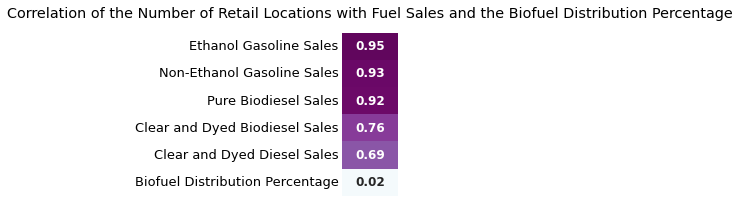

In [75]:
# Selecting relevant columns for correlation analysis
correlation_data = df[['Number of Retail Locations',
                       'Non-Ethanol Gasoline Sales (in gallons)',
                       'Ethanol Gasoline Sales (in gallons)',
                       'Clear and Dyed Diesel Sales (in gallons)',
                       'Clear and Dyed Biodiesel Sales (in gallons)',
                       'Pure Biodiesel Sales (in gallons)',
                       'Biofuel Distribution Percentage']]

# Renaming columns to remove "(in gallons)"
correlation_data.columns = ['Number of Retail Locations',
                            'Non-Ethanol Gasoline Sales',
                            'Ethanol Gasoline Sales',
                            'Clear and Dyed Diesel Sales',
                            'Clear and Dyed Biodiesel Sales',
                            'Pure Biodiesel Sales',
                            'Biofuel Distribution Percentage']

# Computing correlation matrix
correlation_matrix = correlation_data.corr()

display(correlation_matrix)

# Isolating the 'Number of Retail Locations' row/column from the correlation matrix
retail_correlation = correlation_matrix.loc[['Number of Retail Locations']]

# Transposing the 'Number of Retail Locations' correlations for a vertical heatmap
retail_correlation_transposed = retail_correlation.T

# Sorting by correlation coefficient
retail_correlation_transposed_sorted = retail_correlation_transposed.sort_values(by='Number of Retail Locations',
                                                                                 ascending=False)
# Dropping the 'Number of Retail Locations' column to exclude self-correlation
retail_correlation_transposed_sorted = retail_correlation_transposed_sorted.drop('Number of Retail Locations', axis=0)

plt.figure(figsize=(1, 3))
sns.heatmap(retail_correlation_transposed_sorted,
            annot=True,
            annot_kws={"fontweight": "bold"},
            cmap='BuPu',
            cbar=False,
            fmt=".2f",
            xticklabels=False,
            vmin=0,
            vmax=1)
plt.title('Correlation of the Number of Retail Locations with Fuel Sales and the Biofuel Distribution Percentage', pad=15)
plt.tick_params(axis='y', labelsize=13)  # Increasing font size of y-axis ticks
plt.tick_params(axis='y', length=0) # Removing the y-axis tick marks
plt.show()

The matrix indicates strong linear relationships between the `Number of Retail Locations` and the sales of different types of fuel, but no linear relationship with the `Biofuel Distribution Percentage`.

Let's look at the scatter plots to identify potential non-linear relationships.

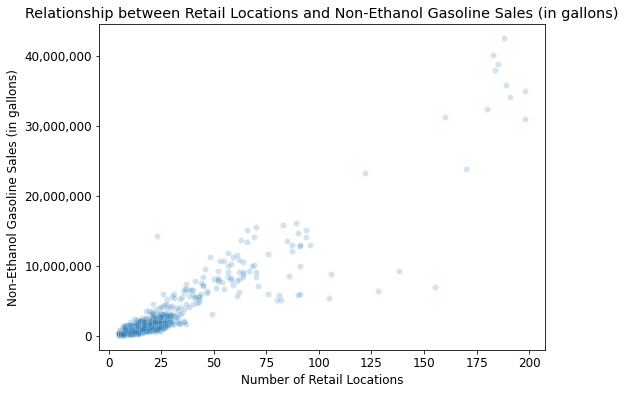

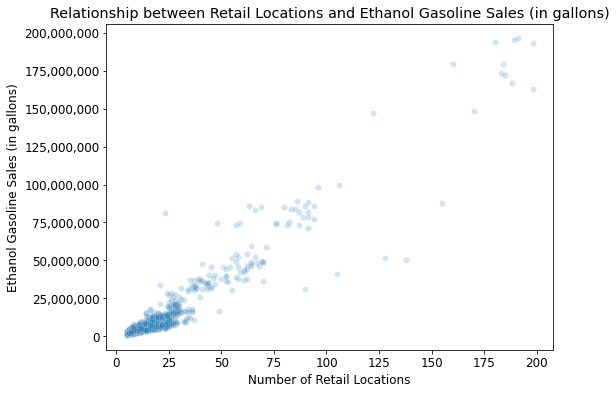

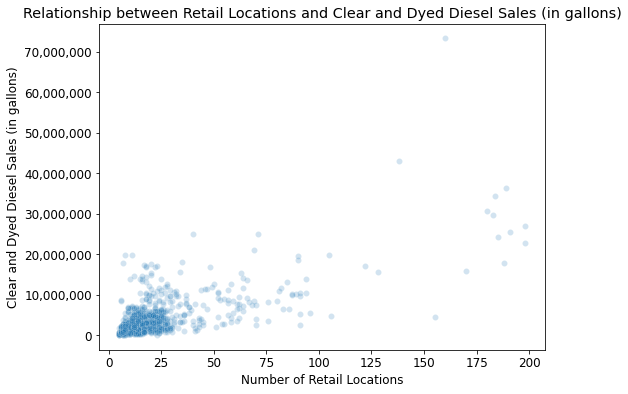

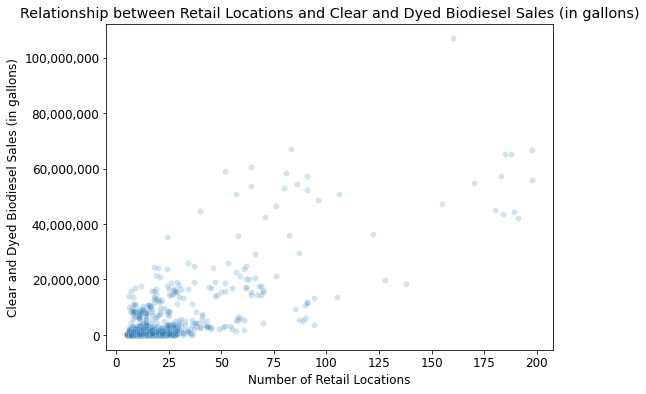

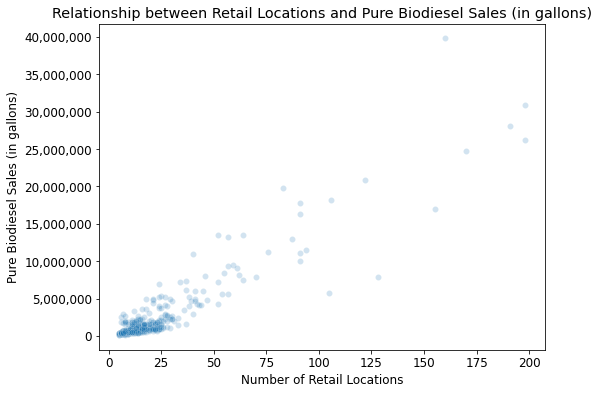

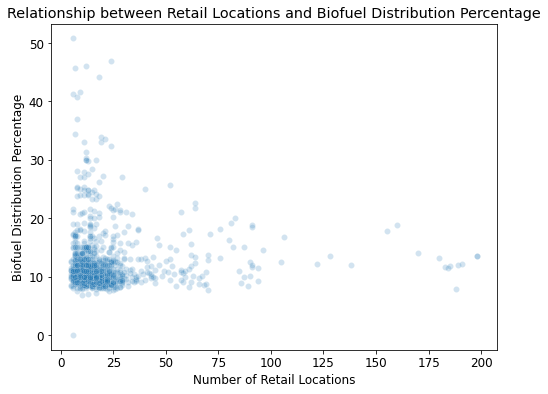

In [28]:
# Columns of interest
columns = [
    'Non-Ethanol Gasoline Sales (in gallons)',
    'Ethanol Gasoline Sales (in gallons)',
    'Clear and Dyed Diesel Sales (in gallons)',
    'Clear and Dyed Biodiesel Sales (in gallons)',
    'Pure Biodiesel Sales (in gallons)',
    'Biofuel Distribution Percentage'
    ]

# Plotting
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Number of Retail Locations', y=column, alpha=0.2)
    plt.title(f'Relationship between Retail Locations and {column}')
    plt.xlabel('Number of Retail Locations')
    plt.ylabel(column)
    
    # To display the full numbers without scientific notation in y axis for clarity:
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) 
    plt.show()

No non-linear relationships can be noticed.

With that said, we can conclude that the `Number of Retail Locations` has a strong positive relationship with the sales of different types of fuel (the more there is retail locations, the more fuel gets sold), but no relationship with the `Biofuel Distribution Percentage`.

## 3.3. Regional Insights

We're going to examine the `Biofuel Distribution Percentage` across different counties through geographical visualization.

For that, we're going to use **geopandas** library and a shapefile defining the boundaries of Iowa's counties.

First, we'll load the shapefile in a GeoDataFrame.

In [29]:
gdf = gpd.read_file('Iowa_County_Boundaries-shp/IowaCounties.shp')

Geopandas makes it easy to plot geospatial data. 

Let's use the .plot() method to quickly visualize the geometries of Iowa's counties.

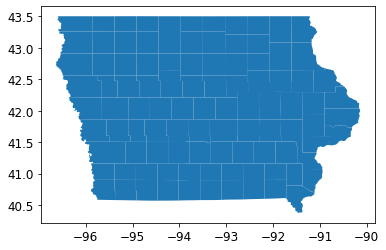

In [30]:
gdf.plot()
plt.show()

Now, let's look at the first 5 rows of our GeoDataFrame to understand its general structure.

In [31]:
gdf.head()

,FID,PERIMETER,DOMCountyI,FIPS,FIPS_INT,CountyName,StateAbbr,SHAPE_Leng,SHAPE_Area,geometry
0,1,193975.5,60,19119,19119,Lyon,IA,2.2,0.2,"POLYGON ((-96.59915 43.50033, -96.58647 43.500..."
1,2,130929.6,72,19143,19143,Osceola,IA,1.4,0.1,"POLYGON ((-95.86089 43.49998, -95.84104 43.499..."
2,3,131290.5,30,19059,19059,Dickinson,IA,1.4,0.1,"POLYGON ((-95.38781 43.50024, -95.37542 43.500..."
3,4,130956.8,32,19063,19063,Emmet,IA,1.4,0.1,"POLYGON ((-94.91476 43.50087, -94.89795 43.500..."
4,5,172890.3,3,19005,19005,Allamakee,IA,1.8,0.2,"POLYGON ((-91.61075 43.50060, -91.61061 43.500..."


We're going to check if there are any discrepancies between the counties' names in our dataset and the GeoDataFrame.

In [32]:
gdf_counties = gdf['CountyName'].unique()
df_counties = df['County'].unique()

# Finding counties present in your dataset but not in the GeoDataFrame
missing_in_gdf = set(df_counties) - set(gdf_counties)

# Finding counties present in the GeoDataFrame but not in your dataset
missing_in_df = set(gdf_counties) - set(df_counties)

# Outputting the lists of missing counties
print("Counties in 'df' but not in 'gdf':", missing_in_gdf)
print("Counties in 'gdf' but not in 'df':", missing_in_df)

Counties in 'df' but not in 'gdf': {'Other'}
Counties in 'gdf' but not in 'df': set()


We have an extra category `Other` in our dataset, but as we're going to perform an inner merge, it will be excluded, so we don't need to make additional steps to take care of it.

Now, we're going to create a plot of the `Biofuel Distribution Percentage` across Iowa's counties for each year registered in our dataset.

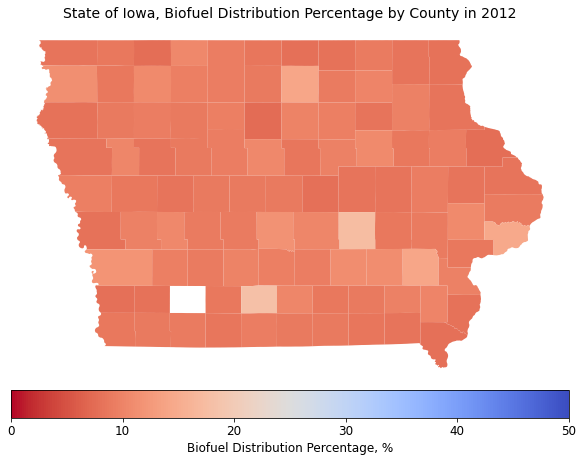

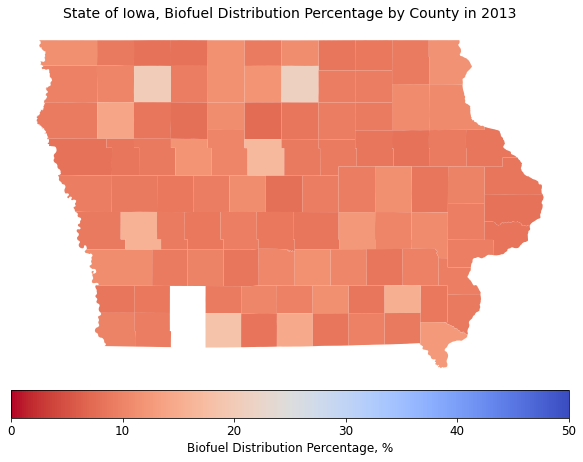

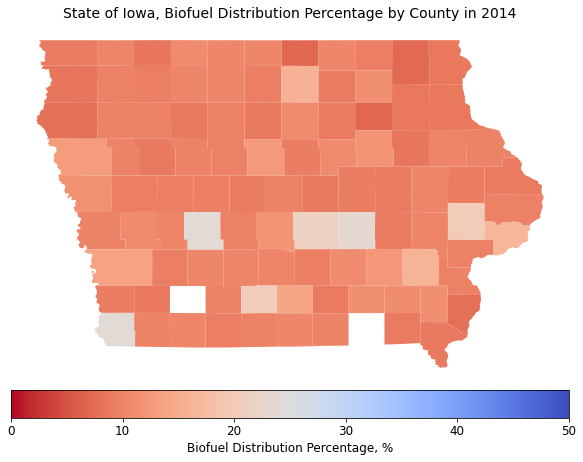

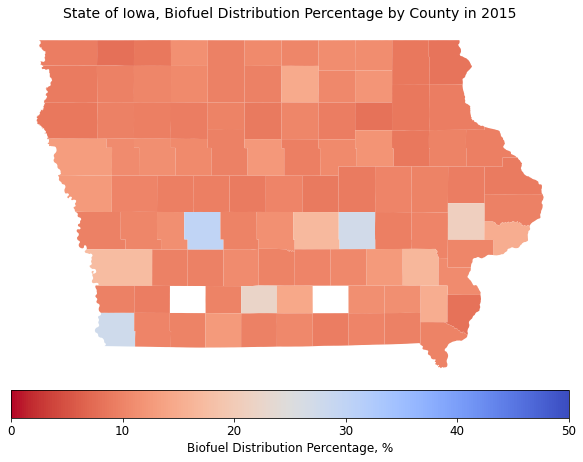

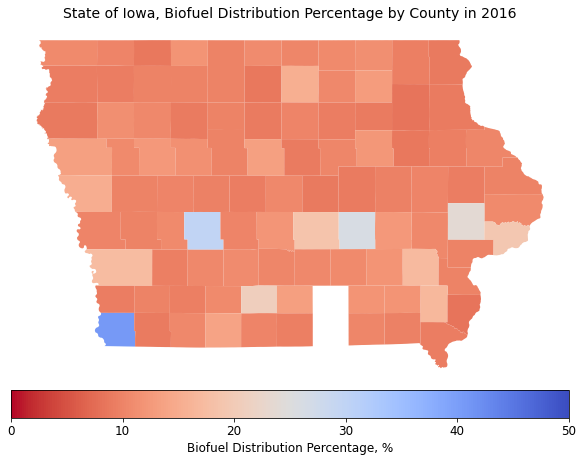

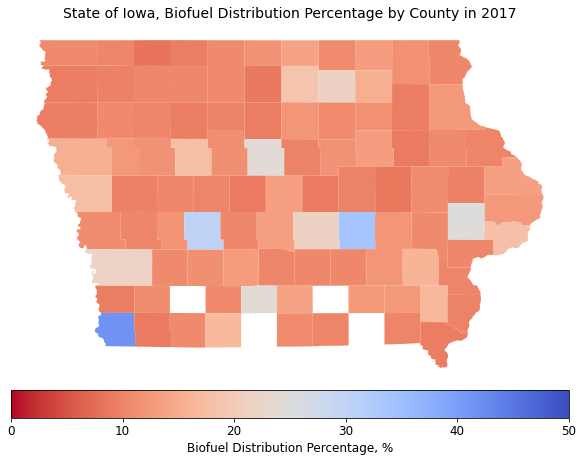

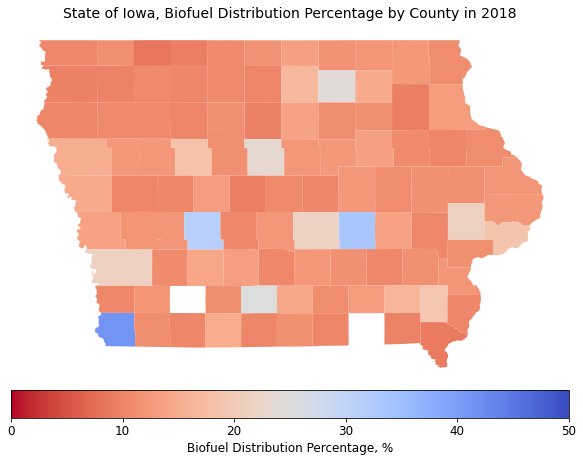

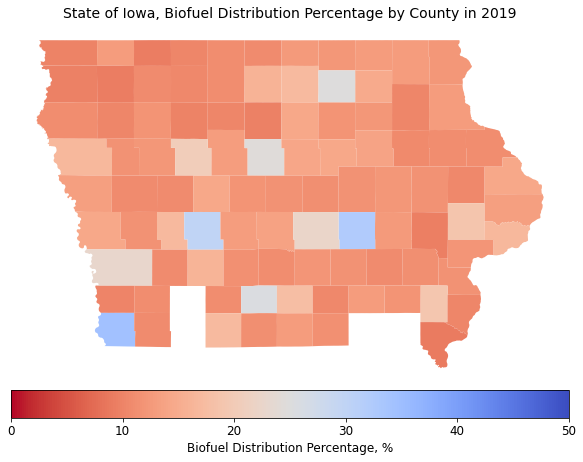

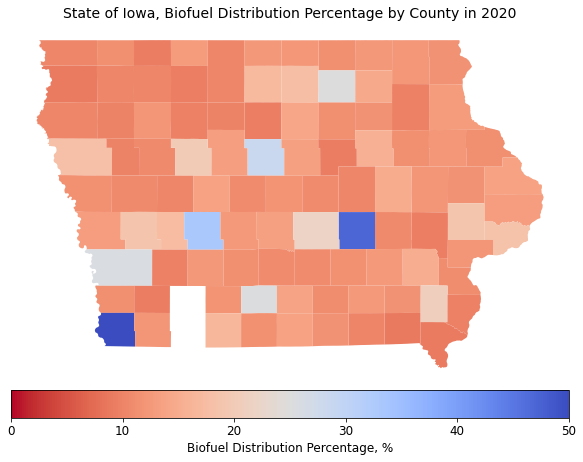

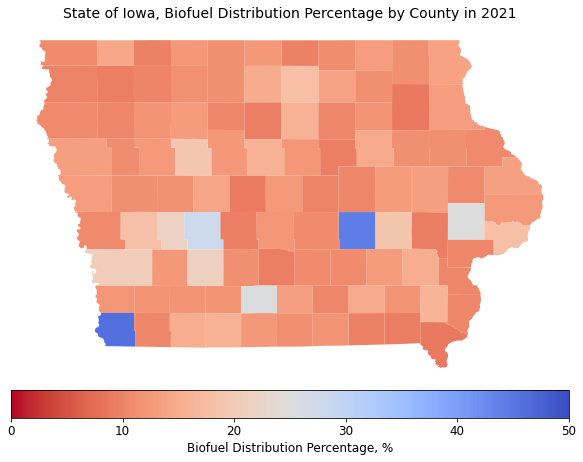

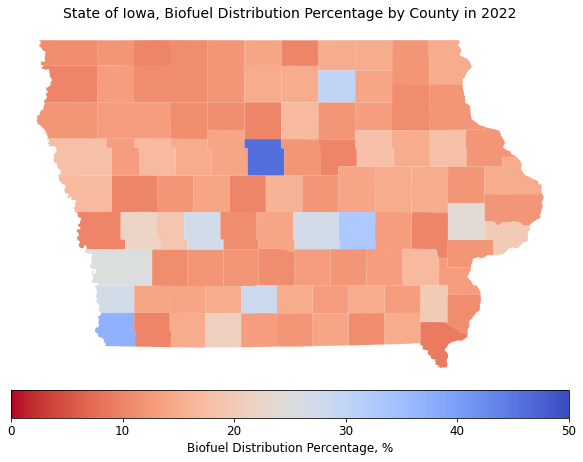

In [80]:
# Looping through each year and creating a plot
for year in range(2012, 2023):
    # Filtering the DataFrame for the current year
    df_year = df[df['Calendar Year'] == year]
    
    # Merging the GeoDataFrame with the annual data
    merged_gdf = gdf.merge(df_year, left_on='CountyName', right_on='County', how='inner')
    
    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    merged_gdf.plot(column='Biofuel Distribution Percentage', ax=ax, legend=True, cmap='coolwarm_r',
                    vmin=0, vmax=50,  # Setting the range for the colormap for consistency
                    legend_kwds={'label': 'Biofuel Distribution Percentage, %', 'orientation': 'horizontal', 'pad': 0.01})
    ax.set_title(f'State of Iowa, Biofuel Distribution Percentage by County in {year}', fontsize=14)
    ax.set_xticks([])  # Removing x-axis ticks
    ax.set_yticks([])  # Removing y-axis ticks
    for spine in ax.spines.values():  # Looping through spines
        spine.set_visible(False)  # Hiding spine
    plt.show()

As we can notice, some of the counties are missing color for certain years. Some of these are the missing values we encountered while cleaning our data, and some rows were missing completely from our dataset from the beginning.

For simplicity's sake, we can assume the linear trend and interpolate and extrapolate those missing values.

The missing values of `Biofuel Distribution Percentage` are:

- 2012: Adams
- 2013: Adams, Taylor
- 2014: Adams, Davis
- 2015: Adams, Monroe
- 2016: Appanoose, Monroe
- 2017: Adams, Davis, Decatur, Monroe
- 2018: Adams, Davis
- 2019: Adams, Davis, Taylor, Van Buren
- 2020: Adams, Taylor

Let's impute them.

In [34]:
# Defining all years that should be in the dataset
all_years = range(2012, 2023)  # 2012 to 2022

# Filtering data for Adams County
adams_data = df[df['County'] == 'Adams']

# Identifing the missing years
missing_years = [year for year in all_years if year not in adams_data['Calendar Year'].values]

# Creating a DataFrame with missing rows for the county
missing_rows = pd.DataFrame({'County': ['Adams']*len(missing_years), 
                             'Calendar Year': missing_years, 
                             'Biofuel Distribution Percentage': [np.nan]*len(missing_years)})

# Using pandas.concat to add the missing rows to adams_data
adams_data = pd.concat([adams_data, missing_rows], ignore_index=True)

# Sorting by year to maintain order
adams_data = adams_data.sort_values('Calendar Year').set_index('Calendar Year')

# Interpolating missing values for 2017, 2018, 2019, 2020
adams_data['Biofuel Distribution Percentage'] = adams_data['Biofuel Distribution Percentage'].interpolate()

# To extrapolate the values for 2012, 2013, 2014, 2015 we'll do the following:
# Calculating the slope
m = adams_data.loc[2017, 'Biofuel Distribution Percentage'] - adams_data.loc[2016, 'Biofuel Distribution Percentage']

# Calculating the intercept
b = adams_data.loc[2016, 'Biofuel Distribution Percentage'] - m * 2016

# Extrapolating for 2012, 2013, 2014, 2015
adams_data.loc[2012, 'Biofuel Distribution Percentage'] = m * 2012 + b
adams_data.loc[2013, 'Biofuel Distribution Percentage'] = m * 2013 + b
adams_data.loc[2014, 'Biofuel Distribution Percentage'] = m * 2014 + b
adams_data.loc[2015, 'Biofuel Distribution Percentage'] = m * 2015 + b


# Now we'll interpolate the missing value for Davis County for 2014, 2017, 2018, 2019 in a similar manner
davis_data = df[df['County'] == 'Davis']
missing_years = [year for year in all_years if year not in davis_data['Calendar Year'].values]
missing_rows = pd.DataFrame({'County': ['Davis']*len(missing_years), 
                             'Calendar Year': missing_years, 
                             'Biofuel Distribution Percentage': [np.nan]*len(missing_years)})

davis_data = pd.concat([davis_data, missing_rows], ignore_index=True)
davis_data = davis_data.sort_values('Calendar Year').set_index('Calendar Year')

davis_data['Biofuel Distribution Percentage'] = davis_data['Biofuel Distribution Percentage'].interpolate()


# Interpolating the values for Appanoose County for years 2016
appanoose_data = df[df['County'] == 'Appanoose']
missing_years = [year for year in all_years if year not in appanoose_data['Calendar Year'].values]
missing_rows = pd.DataFrame({'County': ['Appanoose']*len(missing_years), 
                             'Calendar Year': missing_years, 
                             'Biofuel Distribution Percentage': [np.nan]*len(missing_years)})

appanoose_data = pd.concat([appanoose_data, missing_rows], ignore_index=True)
appanoose_data = appanoose_data.sort_values('Calendar Year').set_index('Calendar Year')

appanoose_data['Biofuel Distribution Percentage'] = appanoose_data['Biofuel Distribution Percentage'].interpolate()


# Interpolating the values for Monroe County for years 2015 and 2016 
monroe_data = df[df['County'] == 'Monroe']
missing_years = [year for year in all_years if year not in monroe_data['Calendar Year'].values]
missing_rows = pd.DataFrame({'County': ['Monroe']*len(missing_years), 
                             'Calendar Year': missing_years, 
                             'Biofuel Distribution Percentage': [np.nan]*len(missing_years)})

monroe_data = pd.concat([monroe_data, missing_rows], ignore_index=True)
monroe_data = monroe_data.sort_values('Calendar Year').set_index('Calendar Year')

monroe_data['Biofuel Distribution Percentage'] = monroe_data['Biofuel Distribution Percentage'].interpolate()


# Interpolating the values for Van Buren county for the year 2019
vanburen_data = df[df['County'] == 'Van Buren']
missing_years = [year for year in all_years if year not in vanburen_data['Calendar Year'].values]
missing_rows = pd.DataFrame({'County': ['Van Buren']*len(missing_years), 
                             'Calendar Year': missing_years, 
                             'Biofuel Distribution Percentage': [np.nan]*len(missing_years)})

vanburen_data = pd.concat([vanburen_data, missing_rows], ignore_index=True)
vanburen_data = vanburen_data.sort_values('Calendar Year').set_index('Calendar Year')

vanburen_data['Biofuel Distribution Percentage'] = vanburen_data['Biofuel Distribution Percentage'].interpolate()


# Interpolating the values for Decatur County for years 2017
decatur_data = df[df['County'] == 'Decatur']
missing_years = [year for year in all_years if year not in decatur_data['Calendar Year'].values]
missing_rows = pd.DataFrame({'County': ['Decatur']*len(missing_years), 
                             'Calendar Year': missing_years, 
                             'Biofuel Distribution Percentage': [np.nan]*len(missing_years)})

decatur_data = pd.concat([decatur_data, missing_rows], ignore_index=True)
decatur_data = decatur_data.sort_values('Calendar Year').set_index('Calendar Year')

decatur_data['Biofuel Distribution Percentage'] = decatur_data['Biofuel Distribution Percentage'].interpolate()


# Interpolating and extrapolating the values for Taylor County for years 2013, 2019, 2020
taylor_data = df[df['County'] == 'Taylor']
missing_years = [year for year in all_years if year not in taylor_data['Calendar Year'].values]
missing_rows = pd.DataFrame({'County': ['Taylor']*len(missing_years), 
                             'Calendar Year': missing_years, 
                             'Biofuel Distribution Percentage': [np.nan]*len(missing_years)})

taylor_data = pd.concat([taylor_data, missing_rows], ignore_index=True)
taylor_data = taylor_data.sort_values('Calendar Year').set_index('Calendar Year')

taylor_data['Biofuel Distribution Percentage'] = taylor_data['Biofuel Distribution Percentage'].interpolate()

m = taylor_data.loc[2022, 'Biofuel Distribution Percentage'] - taylor_data.loc[2021, 'Biofuel Distribution Percentage']
b = taylor_data.loc[2021, 'Biofuel Distribution Percentage'] - m * 2021

taylor_data.loc[2019, 'Biofuel Distribution Percentage'] = m * 2019 + b
taylor_data.loc[2020, 'Biofuel Distribution Percentage'] = m * 2020 + b


# Removing the original county rows
df_filtered = df[~df['County'].isin(['Adams', 'Decatur', 'Davis', 'Monroe', 'Appanoose', 'Van Buren', 'Taylor'])]

# Ensuring our County DataFrames have 'Calendar Year' as a column (not an index)
adams_data = adams_data.reset_index()
davis_data = davis_data.reset_index()
decatur_data = decatur_data.reset_index()
monroe_data = monroe_data.reset_index()
appanoose_data = appanoose_data.reset_index()
vanburen_data = vanburen_data.reset_index()
taylor_data = taylor_data.reset_index()

# Concatenating the DataFrames
df_final = pd.concat([df_filtered,
                      adams_data,
                      davis_data,
                      decatur_data,
                      monroe_data,
                      appanoose_data,
                      vanburen_data,
                      taylor_data])

We have imputed the missing values, and now we're repeating the steps of the visualization.

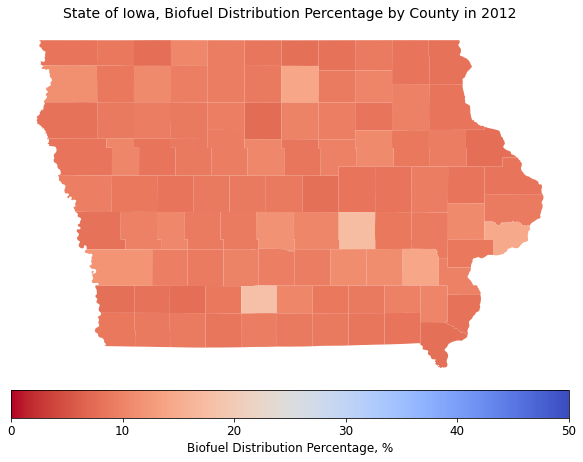

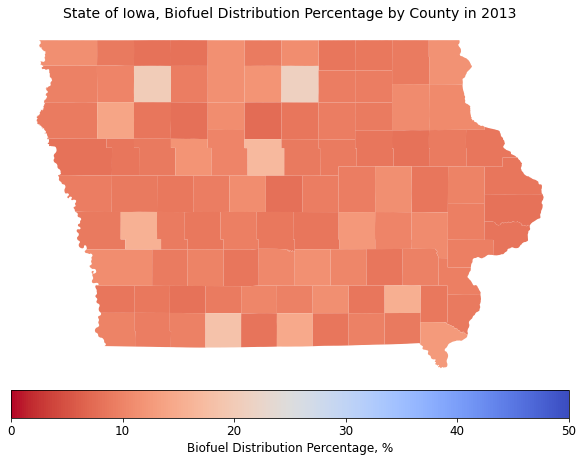

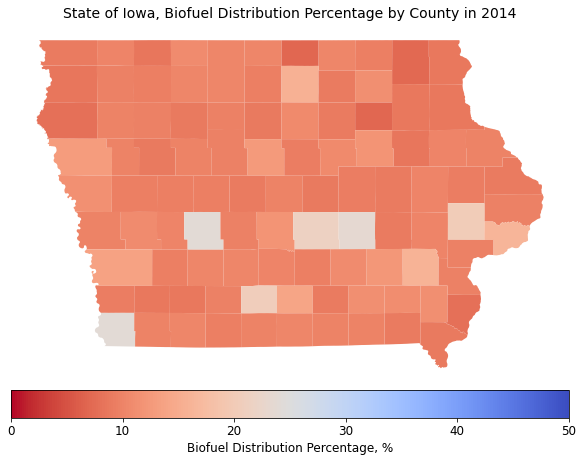

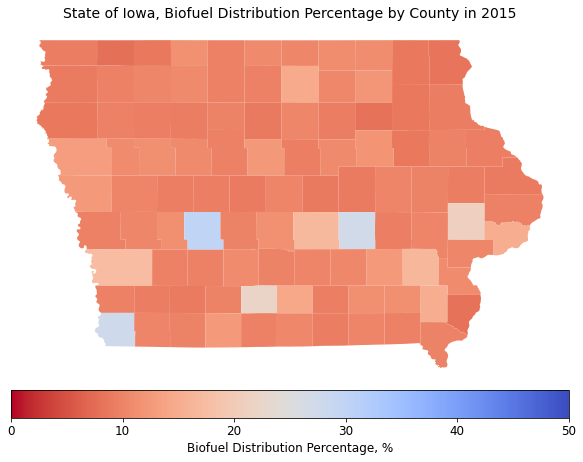

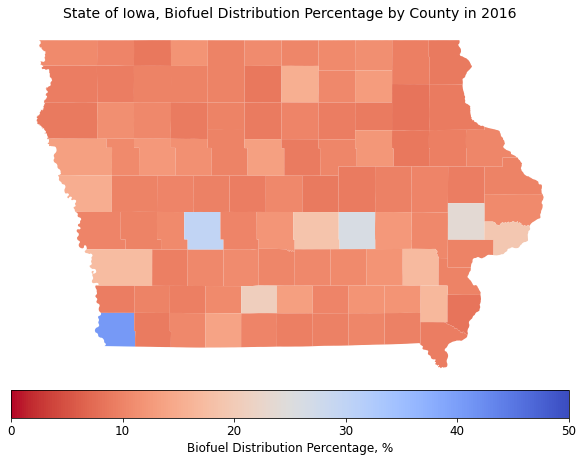

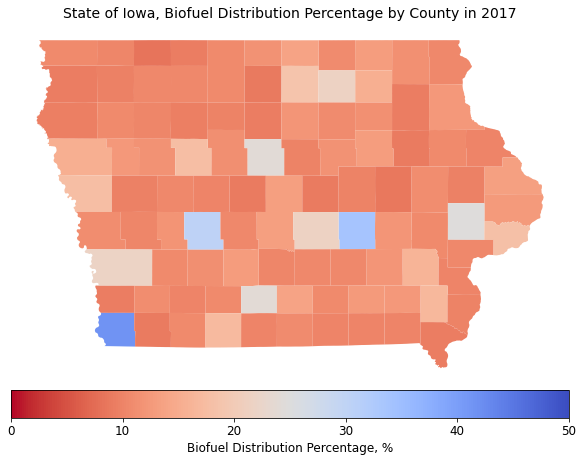

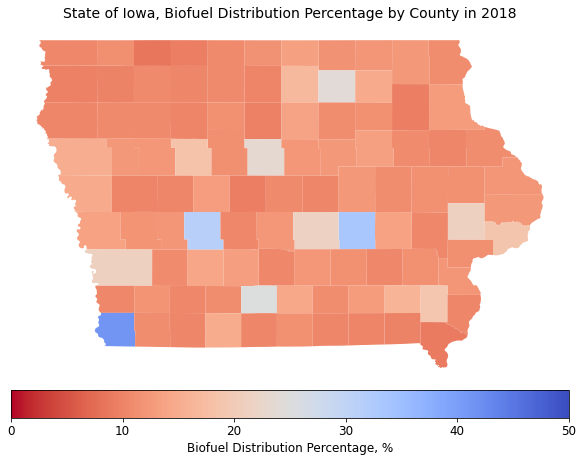

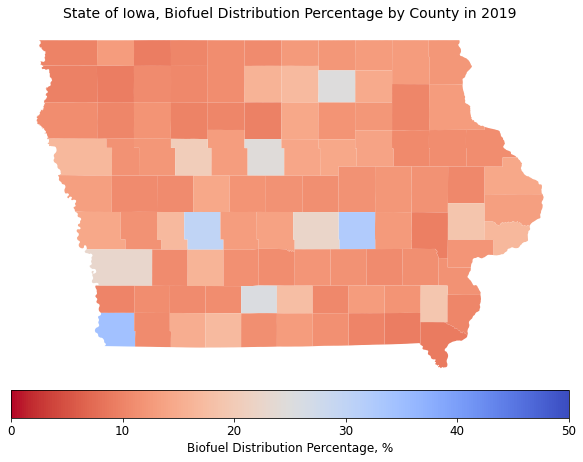

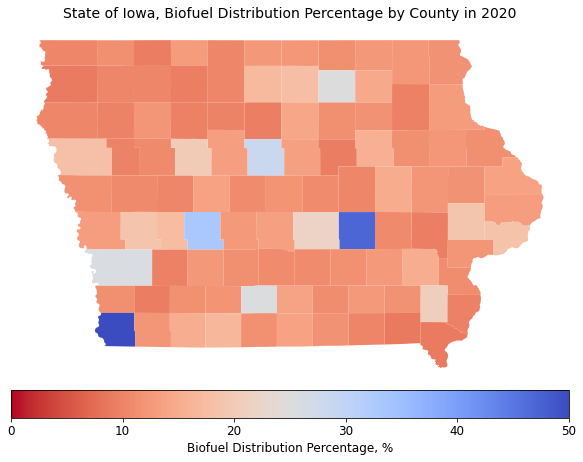

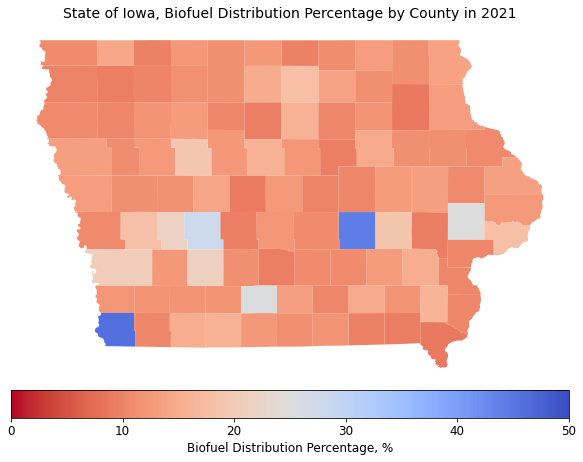

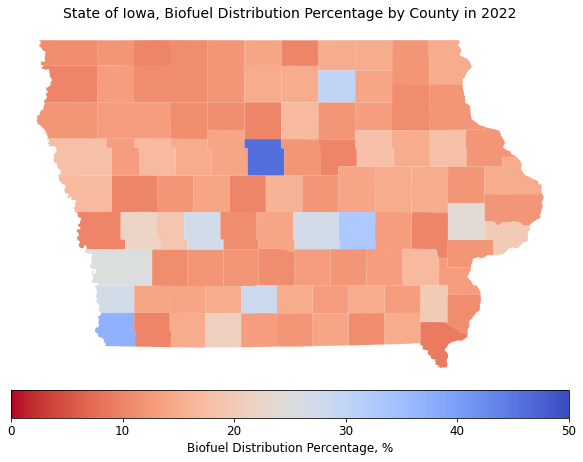

In [81]:
# Looping through each year and creating a plot
for year in range(2012, 2023):
    # Filtering the DataFrame for the current year
    df_year = df_final[df_final['Calendar Year'] == year]
    
    # Merging the GeoDataFrame with the annual data
    merged_gdf = gdf.merge(df_year, left_on='CountyName', right_on='County', how='inner')
    
    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    merged_gdf.plot(column='Biofuel Distribution Percentage', ax=ax, legend=True, cmap='coolwarm_r',
                    vmin=0, vmax=50,  # Setting the range for the colormap for consistency
                    legend_kwds={'label': 'Biofuel Distribution Percentage, %', 'orientation': 'horizontal', 'pad': 0.01})
    ax.set_title(f'State of Iowa, Biofuel Distribution Percentage by County in {year}', fontsize=14)
    ax.set_xticks([])  # Removing x-axis ticks
    ax.set_yticks([])  # Removing y-axis ticks
    for spine in ax.spines.values():  # Looping through spines
        spine.set_visible(False)  # Hiding spine
    plt.show()

No more missing values can be noticed.

For this visualization, we use a color scale where deep red signifies a low `Biofuel Distribution Percentage` (0%), transitioning to an off-white for percentages around 25% (the state's goal), and culminating in deep blue for the highest percentages (up to 50%).

On our series of plots we can see how the average hue of the counties of Iowa becomes more and more pale over the years, with some of the counties eventually changing their color to blue.

While the plots are already descriptive the way they are, I'm going to additionally download them and use as the frames of an animated GIF image, so the change will be more accentuated throughout the timeline. 

## 3.4. Biofuel Adoption

In this section we'll assess the progress towards the state's goal of replacing 25% of petroleum with biofuel by 2020.

We'll start by plotting the average `Biofuel Distribution Percentage` over the registered years.

In [36]:
# Grouping the data by 'Calendar Year' and calculating the mean of the Biofuel Distribution Percentage
annual_biofuel_percentage = df.groupby('Calendar Year')['Biofuel Distribution Percentage'].mean().reset_index()

# Renaming columns for clarity
annual_biofuel_percentage.columns = ['Year', 'Average Biofuel Distribution Percentage']

annual_biofuel_percentage

,Year,Average Biofuel Distribution Percentage
0,2012,9.4
1,2013,10.1
2,2014,10.7
3,2015,11.2
4,2016,11.6
5,2017,12.9
6,2018,13.2
7,2019,13.6
8,2020,13.9
9,2021,13.4


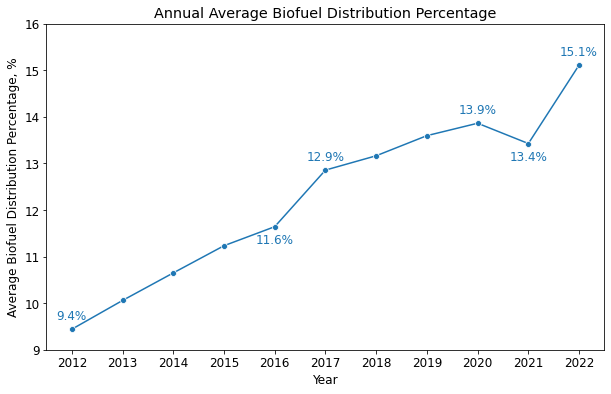

In [37]:
plt.figure(figsize=(10, 6))

# Creating the line plot
sns.lineplot(data=annual_biofuel_percentage, x='Year', y='Average Biofuel Distribution Percentage', marker='o')
plt.title('Annual Average Biofuel Distribution Percentage') 
plt.xlabel('Year') 
plt.ylabel('Average Biofuel Distribution Percentage, %')
plt.xticks(annual_biofuel_percentage['Year'], rotation=0)
plt.ylim(9, 16) # Setting wider y-axis limits so our annotations won't overlap with the chart's frame

# Specifying years to highlight with annotations
highlight_years = [2012, 2016, 2017, 2020, 2021, 2022]

offset = 0.15  # Vertical offset between the annotation and the data point on the line
for year in highlight_years:
    percentage = annual_biofuel_percentage.loc[annual_biofuel_percentage['Year'] == year,
                                               'Average Biofuel Distribution Percentage'].values[0]
    text = f"{percentage:.1f}%" # Formatting the annotations
    # Checking for years when the annotation should be below the line
    if year in [2021, 2016]:
        plt.text(year, percentage - offset, text, ha='center', va='top', color='C0')
    else:
        plt.text(year, percentage + offset, text, ha='center', va='bottom', color='C0')

plt.show()

As we can see on the visualization, despite the overall positive trend over the years (from **9.4% in 2012** to **15.1% in 2022**), the state didn't achieve its goal of replacing 25% of petroleum with biofuel even by 2022.

With that said, let's take a look at the distribution of `Biofuel Distribution Percentage` amongst the counties in 2020 - the year the state had set its goal for.

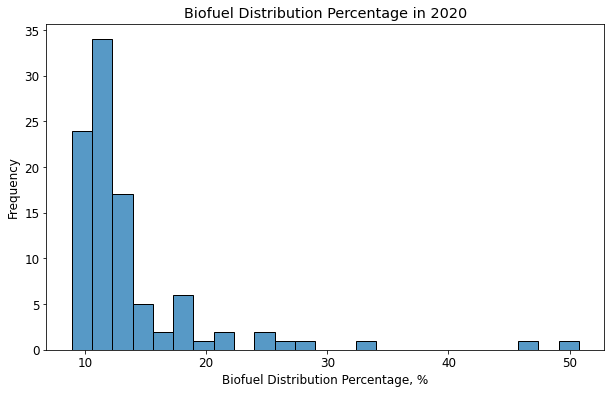

In [38]:
# Filtering the DataFrame for the year 2020
df_2020 = df[df['Calendar Year'] == 2020]

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_2020['Biofuel Distribution Percentage'], bins=25)
plt.title('Biofuel Distribution Percentage in 2020')
plt.xlabel('Biofuel Distribution Percentage, %')
plt.ylabel('Frequency')
plt.show()

It looks like the majority of the counties had their `Biofuel Distribution Percentage` between 10% and 14% by 2020.

The descriptive statistics will help us verify those numbers.

In [39]:
df_2020['Biofuel Distribution Percentage'].describe()

count   98.0
mean    13.9
std      6.7
min      8.9
25%     10.6
50%     11.7
75%     13.6
max     50.8
Name: Biofuel Distribution Percentage, dtype: float64

As we can see, despite the maximum `Biofuel Distribution Percentage` recorded in 2020 being 50.8%, **the majority (75%)** of Iowa's counties had the `Biofuel Distribution Percentage` **below 13.6%**.

Let's see how many counties had their `Biofuel Distribution Percentage` above 25% in 2020.

Counties with Biofuel Distribution equal or above 25% in 2020: 6 counties, or 6.1% of all the counties of state Iowa
These counties are:  Fremont (50.8%), Poweshiek (47.0%), Guthrie (33.0%), Hamilton (28.4%), Pottawattamie (25.7%), Clarke (25.2%)


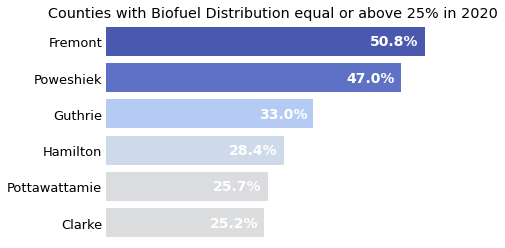

In [71]:
counties_above_25_df = df_2020[df_2020['Biofuel Distribution Percentage'] >= 25]
counties_above_25 = counties_above_25_df.shape[0]  # Count of counties >= 25%
total_counties = df_2020.shape[0]  # Total number of counties in 2020

percentage_above_25 = (counties_above_25 / total_counties) * 100  # Calculating the percentage

# Sorting the DataFrame by 'Biofuel Distribution Percentage' in descending order
counties_above_25_df_sorted = counties_above_25_df.sort_values(by='Biofuel Distribution Percentage', ascending=False)

print(f"Counties with Biofuel Distribution equal or above 25% in 2020: {counties_above_25} counties, "
      f"or {round(percentage_above_25, 1)}% of all the counties of state Iowa")

# An empty list to hold the formatted strings
county_strings = []

# Iterating through the DataFrame rows
for index, row in counties_above_25_df_sorted.iterrows():
    # Formatting the 'County' and 'Biofuel Distribution Percentage' as a string
    county_string = f"{row['County']} ({round(row['Biofuel Distribution Percentage'], 1)}%)"
    # Appending the formatted string to the list
    county_strings.append(county_string)

# Joining all the strings in the list with a comma and space
output_string = ', '.join(county_strings)

print("These counties are: ", output_string)

# Creating a visualization for that list of counties

# For consistency, we'll use the same colormap we used earlier in 3.3. Regional Insights

# Customizing the colormap to use the 'cool' half of 'coolwarm'
cool_half = LinearSegmentedColormap.from_list("cool_half", plt.cm.coolwarm(np.linspace(0.5, 0, 256)))

# Normalizing the Biofuel Distribution Percentage for color mapping
norm = Normalize(vmin=25, vmax=50)

# Creating a horizontal bar plot
plt.figure(figsize=(6, 4))
barplot = sns.barplot(data=counties_above_25_df_sorted, y='County', x='Biofuel Distribution Percentage', orient='h', 
                      palette=cool_half(norm(counties_above_25_df_sorted['Biofuel Distribution Percentage'].values)))

# Iterating through the bars to add text annotations
for bar in barplot.patches:
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.1f}%", color='white', va='center', ha='right',
             fontsize=14, fontweight='bold')

plt.title('Counties with Biofuel Distribution equal or above 25% in 2020')
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='y', labelsize=13)  # Increasing font size of y-axis ticks
plt.tick_params(axis='y', length=0) # Removing the y-axis tick marks
plt.xticks([])  # Hiding x-tick labels and marks
sns.despine(left=True, bottom=True)  # Removing the spines
plt.show()

Now, assuming a linear trend, let's try predicting when the state could achieve its goal of replacing 25% of petroleum with biofuel.

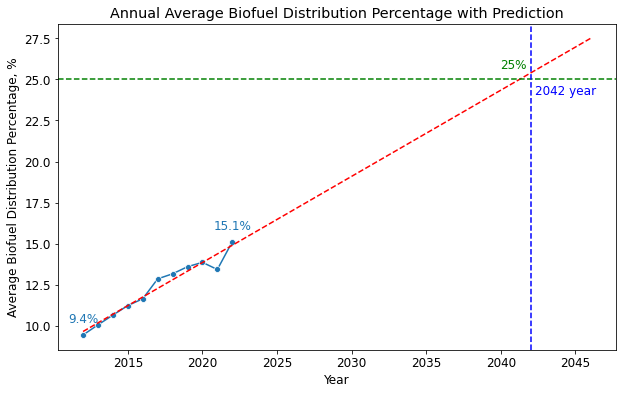

The Biofuel Distribution Percentage is predicted to reach 25% in the year 2042.


In [41]:
# Preparing the data
X = annual_biofuel_percentage['Year'].values.reshape(-1, 1)
y = annual_biofuel_percentage['Average Biofuel Distribution Percentage'].values

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting values
predicted_years = np.arange(X.min(), X.max() + 25).reshape(-1, 1)  # Assuming 25 years into the future
predictions = model.predict(predicted_years)

# Finding the year where the prediction reaches 25%
target_year = predicted_years[predictions >= 25].min()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Average Biofuel Distribution Percentage', data=annual_biofuel_percentage, marker='o')
plt.plot(predicted_years, predictions, linestyle='--', color='red')
plt.axhline(25, color='green', linestyle='--')
plt.axvline(target_year, color='blue', linestyle='--')
plt.title('Annual Average Biofuel Distribution Percentage with Prediction')
plt.xlabel('Year')
plt.ylabel('Average Biofuel Distribution Percentage, %')

# Adding annotations
offset = 0.6  # Vertical offset between the annotation and the data point on the line
for year in [2012, 2022]:
    percentage = annual_biofuel_percentage.loc[annual_biofuel_percentage['Year'] == year,
                                               'Average Biofuel Distribution Percentage'].values[0]
    plt.text(year, percentage + offset, f"{percentage:.1f}%", ha='center', va='bottom', color='C0')

# Adding annotations for the point when the Biofuel Distribution Percentage is predicted to reach 25%
plt.text(2041.7, 25.5, "25%", ha='right', va='bottom', color='green')
plt.text(2042.3, 24.7, "2042 year", ha='left', va='top', color='blue')

plt.show()

print(f"The Biofuel Distribution Percentage is predicted to reach 25% in the year {int(target_year)}.")

# 4. Conclusion

It's time to come back to the questions we asked in the very beginning of this project and see if we can answer them now.

## How have sales of different types of fuel changed over the 2012-2022 period?

![Figure 1](Figure1.png)
<center><i>Figure 1: Annual sales trends for various fuel types.</i></center>

- **Total Ethanol Gasoline Sales** generally remained high. They were increasing in the period between 2012 and 2016, peaking at over 1.37 billion gallons in 2016, then plateaued between 2016 and 2019 before starting to decrease from nearly 1.35 billion gallons in 2019 to slightly over 1.11 billion gallons in 2022.
- **Total Clear and Dyed Biodiesel Sales** were on the rise from about 286 million gallons in 2012 to approximately 495 million gallons in 2019, then entering a potential plateau. 
- **Total Clear and Dyed Diesel Sales**  showed fluctuations over the years with a peak in 2015 (over 481 million gallons) before beginning to decline, with a slight increase to nearly 350 million gallons noted in 2022.
- **Total Pure Biodiesel Sales**, introduced in 2018, remain relatively stable with a slight decrease over the registered years from nearly 210 million gallons in 2018 to about 198 million gallons in 2022.
- **Total Non-Ethanol Gasoline Sales**  consistently decreased throughout the entire period from approximately 272 million gallons in 2012 to around 163 million gallons in 2022.

## How do fuel sales and the biofuel distribution percentage correlate with the number of retail locations?

The number of retail locations has a strong positive relationship with fuel sales across all types (in other words, fuel sales increase proportionally with the number of retail outlets). Figure 2 below shows the heatmap of the relationships sorted by their strength.

![Figure 2](Figure2.png)
<center><i>Figure 2: Correlation of the number of retail locations with fuel sales and the biofuel distribution percentage.</i></center>

A correlation coefficient close to 1 indicates a strong positive relationship, while a coefficient near 0 suggests no linear relationship.

No relationship between the `Number of Retail Locations` and the `Biofuel Distribution Percentage` was found.

## What is the biofuel distribution percentage across different counties, and how does it compare to the state's goal?

The State of Iowa set a goal to replace 25% of petroleum in the state with biofuel by 2020.

The data shows that **by 2020, the majority (75%) of Iowa's counties had the `Biofuel Distribution Percentage` below 13.6%**, falling significantly short of this target.

There were **6 counties** with `Biofuel Distribution` equal or above 25% in 2020, or **6.1% of all the counties** of state Iowa.
These counties are listed below on Figure 3.

![Figure 3](Figure3.png)
<center><i>Figure 3: The list of counties with biofuel distribution equal or above 25% in 2020.</i></center>

The following animation on Figure 4 illustrates the yearly changes in biofuel distribution percentages across Iowa counties over a decade.

A color scale is used where deep red signifies a low `Biofuel Distribution Percentage` (0%), transitioning to an off-white for percentages around 25% (the state's goal), and culminating in deep blue for the highest percentages (up to 50%).

![Figure 4](Figure4.gif)
<center><i>Figure 4: Animated biofuel distribution percentage by county (2012-2022).</i></center>

## How does the biofuel distribution percentage trend over the years, and does the state meet its 2020 goal?

There has been a gradual increase in the biofuel distribution percentage from **9.4% in 2012** to **15.1% in 2022**, but **the state did not achieve its goal of replacing 25% of petroleum with biofuel by 2020**.

![Figure 5](Figure5.png)
<center><i>Figure 5: Annual average biofuel distribution percentage and forecast to 25% goal.</i></center>

Assuming a linear trend, the `Biofuel Distribution Percentage` is **predicted to reach 25% in the year 2042**.